In [63]:
import graspologic

import numpy as np
%matplotlib inline


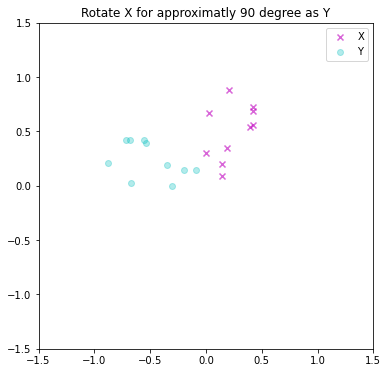

In [64]:
# For the first step, we plot a set of 10 points, X. 
# By rotate X in n degree, we get Y.

import matplotlib.pyplot as plt

# Import an random array of (10,2) as the coordinates of 10 points in X
# For rotation, introduce Z = X, Rotate Z in n degree to get Y away from X
np.random.seed(1)
X = Y = Z = np.random.rand(10,2)

i = 0
n = 1.57
while i <= 9:
    a_Z= Z[i,0]
    b_Z = Z[i,1]
    c = (a_Z**2 + b_Z**2)**0.5
    n_Z = np.arctan(b_Z/a_Z)
    a_Y = c* np.cos(n + n_Z) 
    b_Y = c* np.sin(n + n_Z)
    Y[i] = ([a_Y, b_Y])
    i = i+1

np.random.seed(1)
X = np.random.rand(10,2)

# Here we get two dot sets X,Y with 10 dots of same shape, 
# but placed away from each other
# Plot X, Y
plt.subplots(1, 1, figsize=(6, 6))
plt.title("Rotate X for approximatly 90 degree as Y")
plt.scatter(X[:,0], X[:,1], label="X", alpha=0.6, color='m', marker='x')
plt.scatter(Y[:,0], Y[:,1], label="Y", alpha=0.3, color='c')
plt.xlim(-1.50, 1.50)
plt.ylim(-1.50, 1.50)
plt.legend();

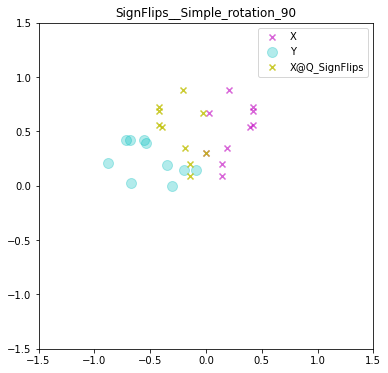

In [65]:
# Use SignFlips to get a Q that could align X with Y.
# X@Q_SignFlips is the output of rotated X by SignFlips.
from graspologic.align import SignFlips
X_prime_SignFlips = SignFlips().fit_transform(X, Y)
plt.subplots(1, 1, figsize=(6, 6))
plt.title("SignFlips__Simple_rotation_90")
plt.scatter(X[:,0], X[:,1], label="X", alpha=0.6, color='m', marker='x')
plt.scatter(Y[:,0], Y[:,1], label="Y", alpha=0.3, color='c', s=100)
plt.scatter(X_prime_SignFlips[:,0], X_prime_SignFlips[:,1], label="X@Q_SignFlips", alpha=0.8, color='y', marker='x')
plt.xlim(-1.50, 1.50)
plt.ylim(-1.50, 1.50)
plt.legend();

In [66]:
norm_SignFlips = np.linalg.norm(X_prime_SignFlips - Y)
print(norm_SignFlips)

1.5436991763168884


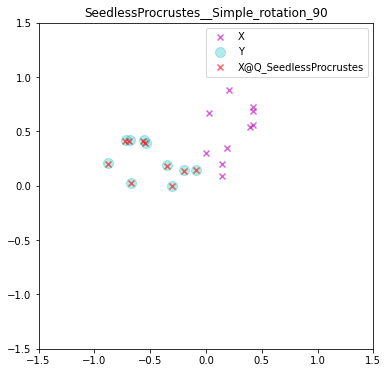

In [67]:
# Use SeedlessProcrustes to get a Q that could align X with Y.
# X@Q_SeedlessProcrustes is the output of rotated X by SeedlessProcrustes.

from graspologic.align import SeedlessProcrustes

X_prime_Seedless = SeedlessProcrustes().fit_transform(X, Y)
plt.subplots(1, 1, figsize=(6, 6))
plt.title("SeedlessProcrustes__Simple_rotation_90")
plt.scatter(X[:,0], X[:,1], label="X", alpha=0.6, color='m', marker='x')
plt.scatter(Y[:,0], Y[:,1], label="Y", alpha=0.3, color='c', s=100)
plt.scatter(X_prime_Seedless[:,0], X_prime_Seedless[:,1], label="X@Q_SeedlessProcrustes", alpha=0.6, color='r', marker='x')
plt.xlim(-1.50, 1.50)
plt.ylim(-1.50, 1.50)
plt.legend();

In [68]:
norm_Seedless = np.linalg.norm(X_prime_Seedless - Y)
print(norm_Seedless)

0.021527390034607845


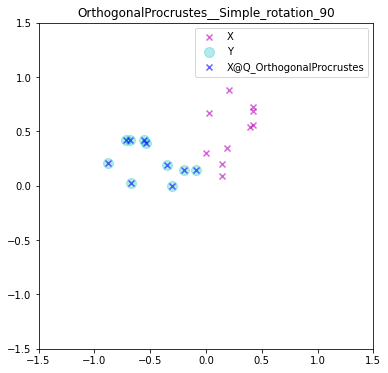

In [69]:
# Use OrthogonalProcrustes to get a Q that could align X with Y.
# X@Q_OrthogonalProcrustes is the output of rotated X by OrthogonalProcrustes.

from graspologic.align import OrthogonalProcrustes

X_prime_Orthogonal = OrthogonalProcrustes().fit_transform(X, Y)
plt.subplots(1, 1, figsize=(6, 6))
plt.title("OrthogonalProcrustes__Simple_rotation_90")
plt.scatter(X[:,0], X[:,1], label="X", alpha=0.6, color='m', marker='x')
plt.scatter(Y[:,0], Y[:,1], label="Y", alpha=0.3, color='c', s=100)
plt.scatter(X_prime_Orthogonal[:,0], X_prime_Orthogonal[:,1], label="X@Q_OrthogonalProcrustes", alpha=0.6, color='b', marker='x')
plt.xlim(-1.50, 1.50)
plt.ylim(-1.50, 1.50)
plt.legend();

In [70]:
norm_Orthogonal = np.linalg.norm(X_prime_Orthogonal - Y)
print(norm_Orthogonal)

9.045038353005666e-16


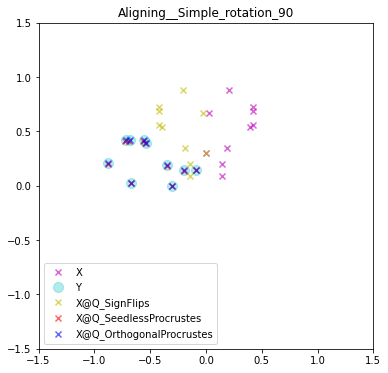

In [71]:
# Plot all the ratation by Aligning for comparison.
plt.subplots(1, 1, figsize=(6, 6))
plt.title("Aligning__Simple_rotation_90")
plt.scatter(X[:,0], X[:,1], label="X", alpha=0.6, color='m', marker='x')
plt.scatter(Y[:,0], Y[:,1], label="Y", alpha=0.3, color='c', s=100)
plt.scatter(X_prime_SignFlips[:,0], X_prime_SignFlips[:,1], label="X@Q_SignFlips", alpha=0.6, color='y', marker='x')
plt.scatter(X_prime_Seedless[:,0], X_prime_Seedless[:,1], label="X@Q_SeedlessProcrustes", alpha=0.6, color='r', marker='x')
plt.scatter(X_prime_Orthogonal[:,0], X_prime_Orthogonal[:,1], label="X@Q_OrthogonalProcrustes", alpha=0.6, color='b', marker='x')
plt.xlim(-1.50, 1.50)
plt.ylim(-1.50, 1.50)
plt.legend();

In [72]:
# Here, we introduce linlg.norm in numpy to calculate 
# the Frobenius norm of X_prime - Y, for comparing
# the aligning ability of diffrent fucntions in this example
norm_SignFlips = np.linalg.norm(X_prime_SignFlips - Y)
norm_Seedless = np.linalg.norm(X_prime_Seedless - Y)
norm_Orthogonal = np.linalg.norm(X_prime_Orthogonal - Y)
print(norm_SignFlips)
print(norm_Seedless)
print(norm_Orthogonal)

1.5436991763168884
0.021527390034607845
9.045038353005666e-16


In [73]:
# In this case, SignFlips seems to work the worse for aligning X with Y. Though 
# two Procrustes module seem to work similarly well, OrthogonalProcrustes works 
# slightly better than the other two in this case.